In [60]:
import graphviz
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [57]:
def create_fnn_graph_with_layer_labels():
    dot = graphviz.Digraph(format='png')

    # Set up graph attributes
    dot.attr(rankdir='LR', splines='line')

    # Input layer (3 nodes) with label
    with dot.subgraph(name='cluster_input') as c:
        c.attr(label='Input', labelloc='t', fontsize='20')  # 'labelloc' sets the label location to the top
        c.attr(color='none')  # No border around the cluster
        input_nodes = ['input1', 'input2', 'input3']
        for node in input_nodes:
            c.node(node, shape='circle', style='filled', color='black', width='0.4', label='')

    # Hidden layer (5 nodes) with label
    with dot.subgraph(name='cluster_hidden') as c:
        c.attr(label='Hidden', labelloc='t', fontsize='20')
        c.attr(color='none')
        hidden_nodes = ['hidden1', 'hidden2', 'hidden3', 'hidden4', 'hidden5']
        for node in hidden_nodes:
            c.node(node, shape='circle', style='filled', color='gray', width='0.4', label='')

    # Output layer (3 nodes) with label
    with dot.subgraph(name='cluster_output') as c:
        c.attr(label='Output', labelloc='t', fontsize='20')
        c.attr(color='none')
        output_nodes = ['output1', 'output2', 'output3']
        for node in output_nodes:
            c.node(node, shape='circle', style='filled', color='black', width='0.4', label='')

    # Connect input layer to hidden layer
    for input_node in input_nodes:
        for hidden_node in hidden_nodes:
            dot.edge(input_node, hidden_node, arrowsize='0.5')

    # Connect hidden layer to output layer
    for hidden_node in hidden_nodes:
        for output_node in output_nodes:
            dot.edge(hidden_node, output_node, arrowsize='0.5')

    return dot

# Create the FNN graph
fnn_graph = create_fnn_graph_with_layer_labels()

# Render the graph to a PNG image file
fnn_graph.render(filename='./ThesisGraphics/FNNgraph', format='png', cleanup=True)


'ThesisGraphics\\FNNgraph.png'

In [58]:
def create_rbm_graph():
    dot = graphviz.Digraph(format='png')

    # Set up graph attributes
    dot.attr(rankdir='LR', splines='line')

    # Visible (Input) layer (3 nodes) with label
    with dot.subgraph(name='cluster_input') as c:
        c.attr(label='Visible', labelloc='t', fontsize='20')  # 'Visible' for the RBM input layer
        c.attr(color='none')  # No border around the cluster
        input_nodes = ['input1', 'input2', 'input3']
        for node in input_nodes:
            c.node(node, shape='circle', style='filled', color='black', width='0.4', margin='0.1', label='')

    # Hidden layer (5 nodes) with label
    with dot.subgraph(name='cluster_hidden') as c:
        c.attr(label='Hidden', labelloc='t', fontsize='20')
        c.attr(color='none')
        hidden_nodes = ['hidden1', 'hidden2', 'hidden3', 'hidden4', 'hidden5']
        for node in hidden_nodes:
            c.node(node, shape='circle', style='filled', color='gray', width='0.4', margin='0.1', label='')

    # Connect visible (input) layer to hidden layer with bidirectional arrows
    for input_node in input_nodes:
        for hidden_node in hidden_nodes:
            dot.edge(input_node, hidden_node, dir='both', arrowsize='0.5')  # Adjust arrowsize for spacing

    return dot

# Create the RBM graph
rbm_graph = create_rbm_graph()

# Render the graph to a PNG image file
rbm_graph.render(filename='./ThesisGraphics/RBMgraph', format='png', cleanup=True)

'ThesisGraphics\\RBMgraph.png'

Text(0.5, 1.0, 'Restricted Boltzmann Machine')

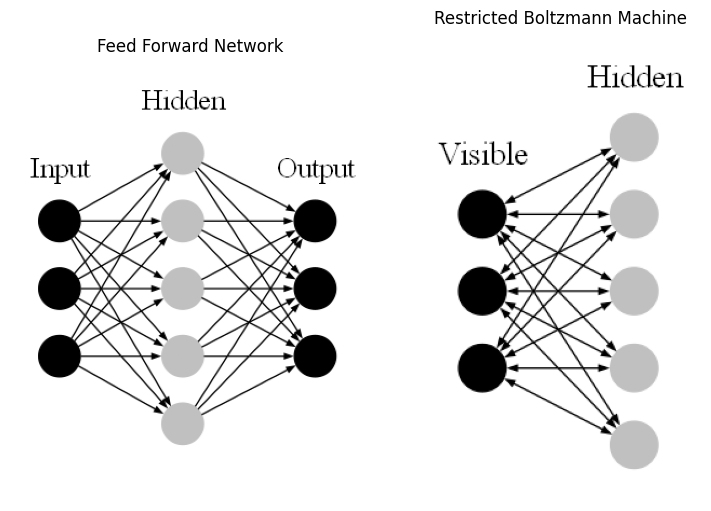

In [66]:
img0 =  mpimg.imread('./ThesisGraphics/FNNgraph.png')
img1 = mpimg.imread('./ThesisGraphics/RBMgraph.png')
aspect0 = img0.shape[1] / img0.shape[0]
aspect1 = img1.shape[1] / img1.shape[0]
common_height = 5
width0 = common_height * aspect0
width1 = common_height * aspect1
figure, axes = plt.subplots(1, 2, layout='constrained', figsize=(width0 + width1, common_height))
axes[0].imshow(img0)
axes[0].axis(False)
axes[0].set_title('Feed Forward Network')
axes[1].imshow(img1)
axes[1].axis(False)
axes[1].set_title('Restricted Boltzmann Machine')

Text(0.5, 1.0, 'b) Restricted Boltzmann Machine')

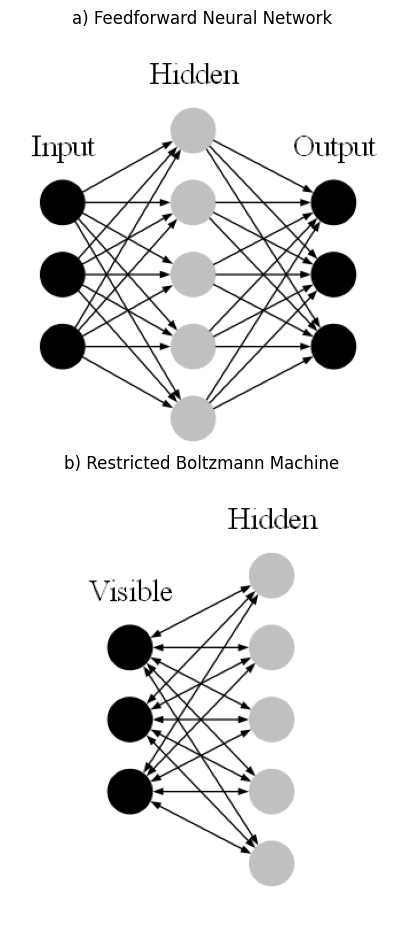

In [86]:
img1 =  mpimg.imread('./ThesisGraphics/FNNgraph.png')
img2 = mpimg.imread('./ThesisGraphics/RBMgraph.png')

# Calculate the aspect ratios
aspect1 = img1.shape[1] / img1.shape[0]  # width / height
aspect2 = img2.shape[1] / img2.shape[0]  # width / height

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1)

# Display the images
ax1.imshow(img1)
ax1.axis('off')  # Optional: Turn off the axis

ax2.imshow(img2)
ax2.axis('off')  # Optional: Turn off the axis


common_width = 0.8  # 80% of the figure width

# Calculate the height based on aspect ratio
height1 = common_width / aspect1
height2 = common_width / aspect2

# Set the position of each subplot: [left, bottom, width, height]
ax1.set_position([(1 - common_width) / 2, 0.5 + (height2 / 2), common_width, height1])
ax2.set_position([(1 - common_width) / 2, 0.5 - (height2 / 2) + 0.4, common_width, height1])

ax1.set_title('a) Feedforward Neural Network')
ax2.set_title('b) Restricted Boltzmann Machine')



In [88]:
fig.savefig('./ThesisGraphics/NetworkComparison.png')